In [4]:
%matplotlib nbagg
import atomap.api as am
import numpy as np
import atomap.dummy_data as dummy_data
import scipy.ndimage
import matplotlib.patches 
from ncempy.io import dm
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import hyperspy.api as hs

In [14]:
im0 = dm.dmReader('BSE._0201_Cut.dm4')



plt.imshow(im0['data'], cmap=plt.cm.inferno) #show the single image from the data file

scalebar = ScaleBar((im0['pixelSize'][0])*1e-9)  # 1 pixel = 2.2736310958862305e-11 meter
plt.gca().add_artist(scalebar)
scalebar.location = 'lower right'
scalebar.box_alpha = 0.2
scalebar.length_fraction = 0.2
plt.axis(False)
plt.colorbar()
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()
type(im0)

dict

<IPython.core.display.Javascript object>


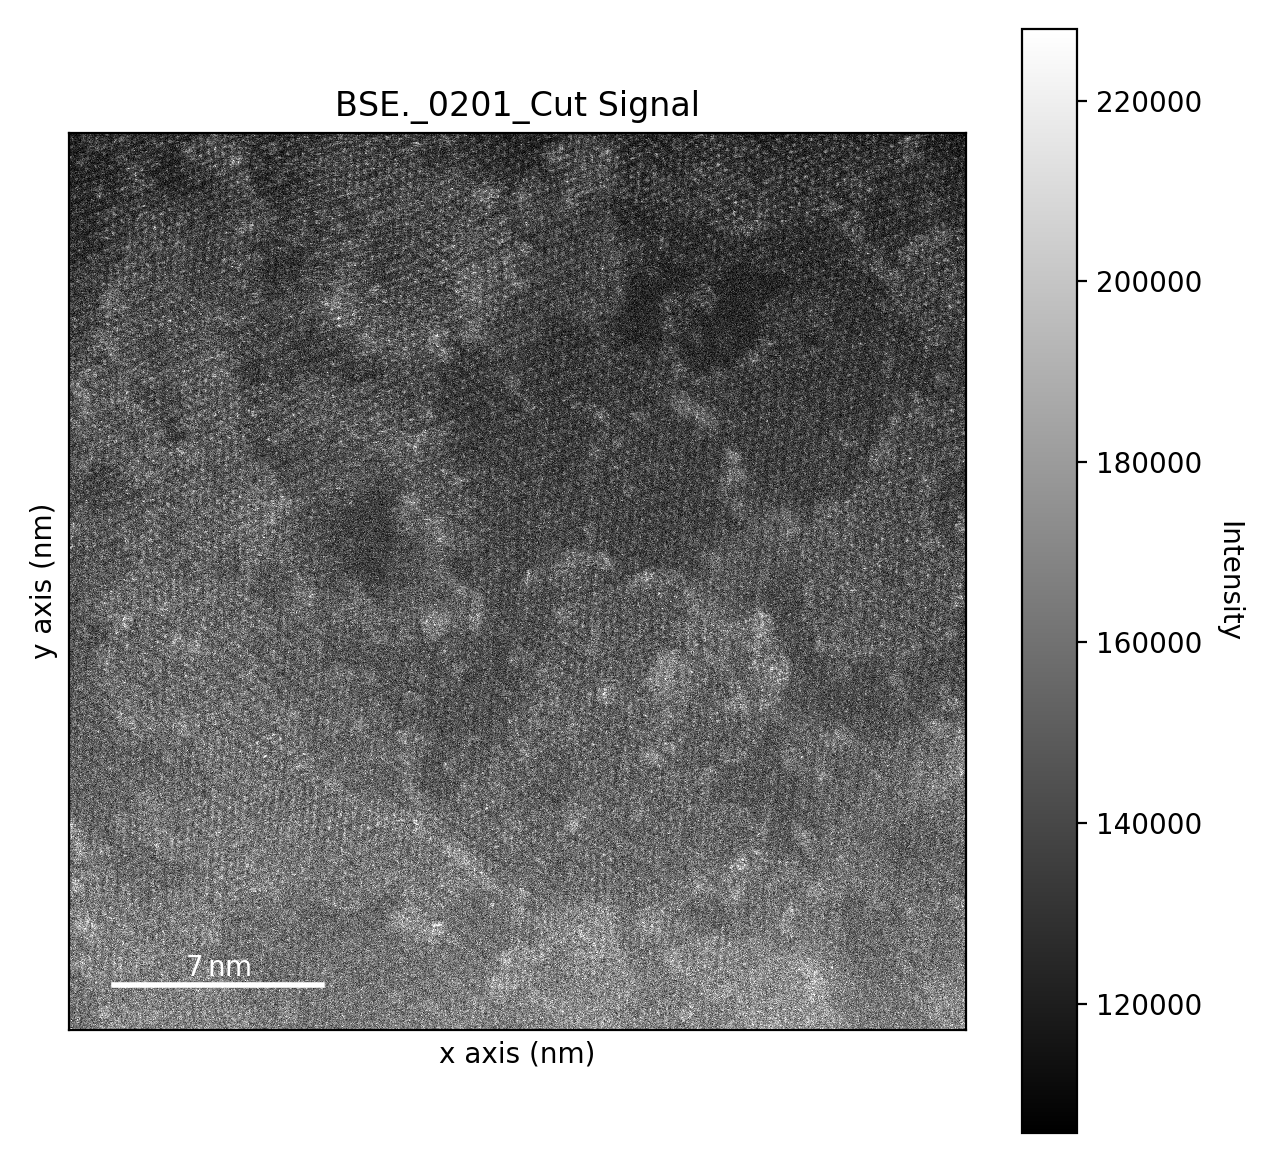

hyperspy._signals.signal2d.Signal2D

In [19]:
s = hs.load('BSE._0201_Cut.dm4') 

s.plot()
type(s)

<IPython.core.display.Javascript object>


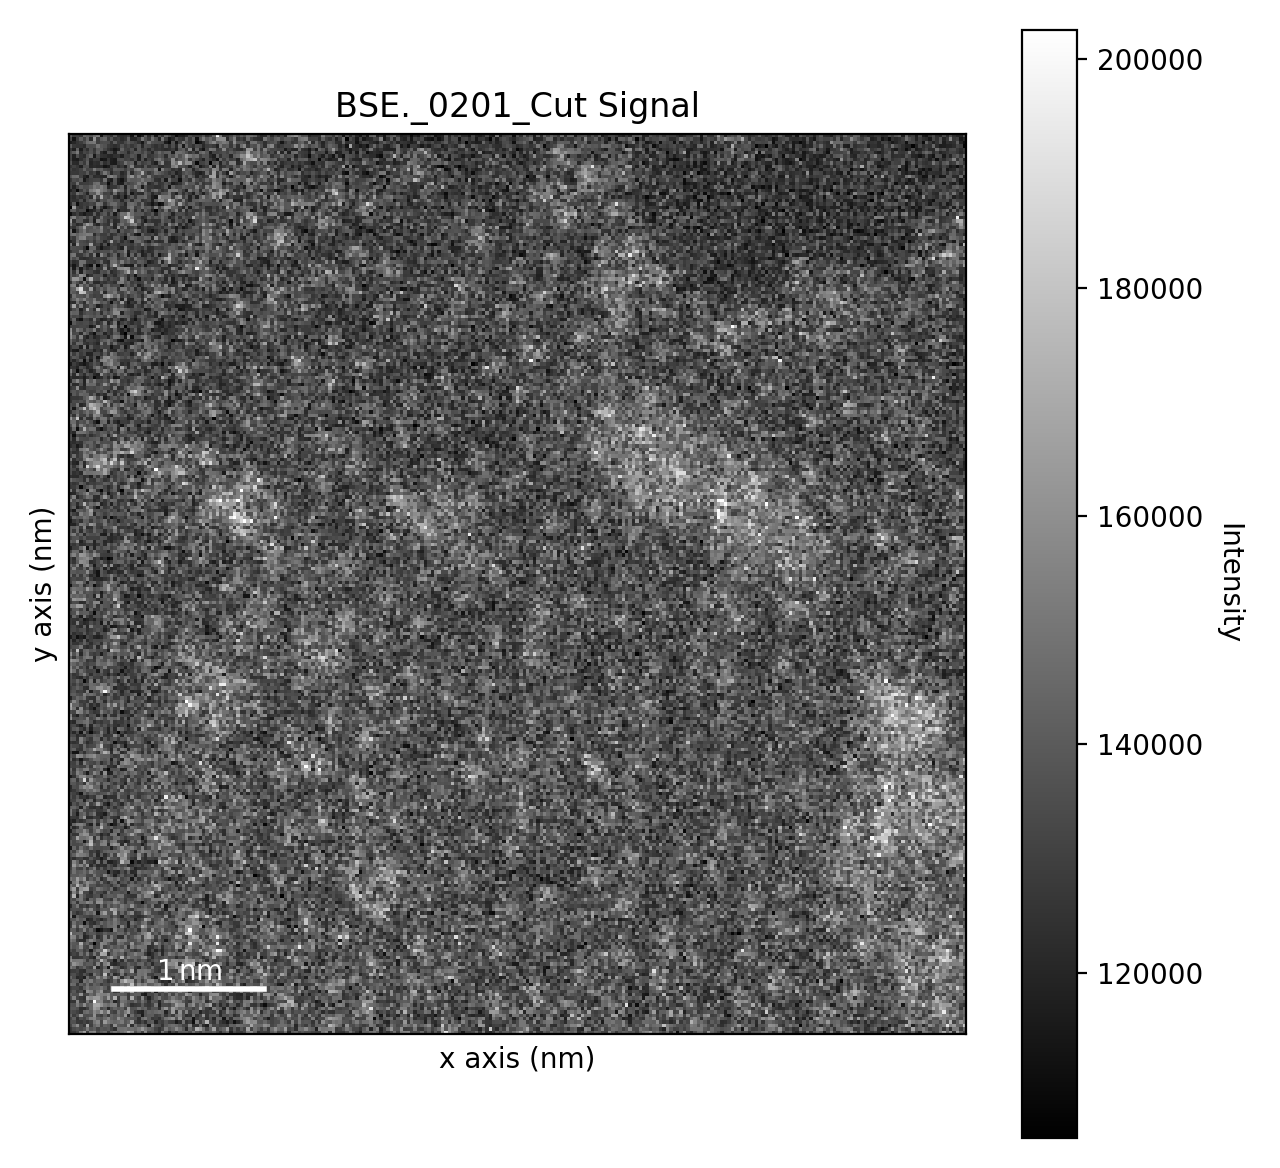

In [129]:
im = hs.load('BSE._0201_Cut.dm4')
imc = im.isig[28.:34., 7.:13.]
imc.plot()

<IPython.core.display.Javascript object>


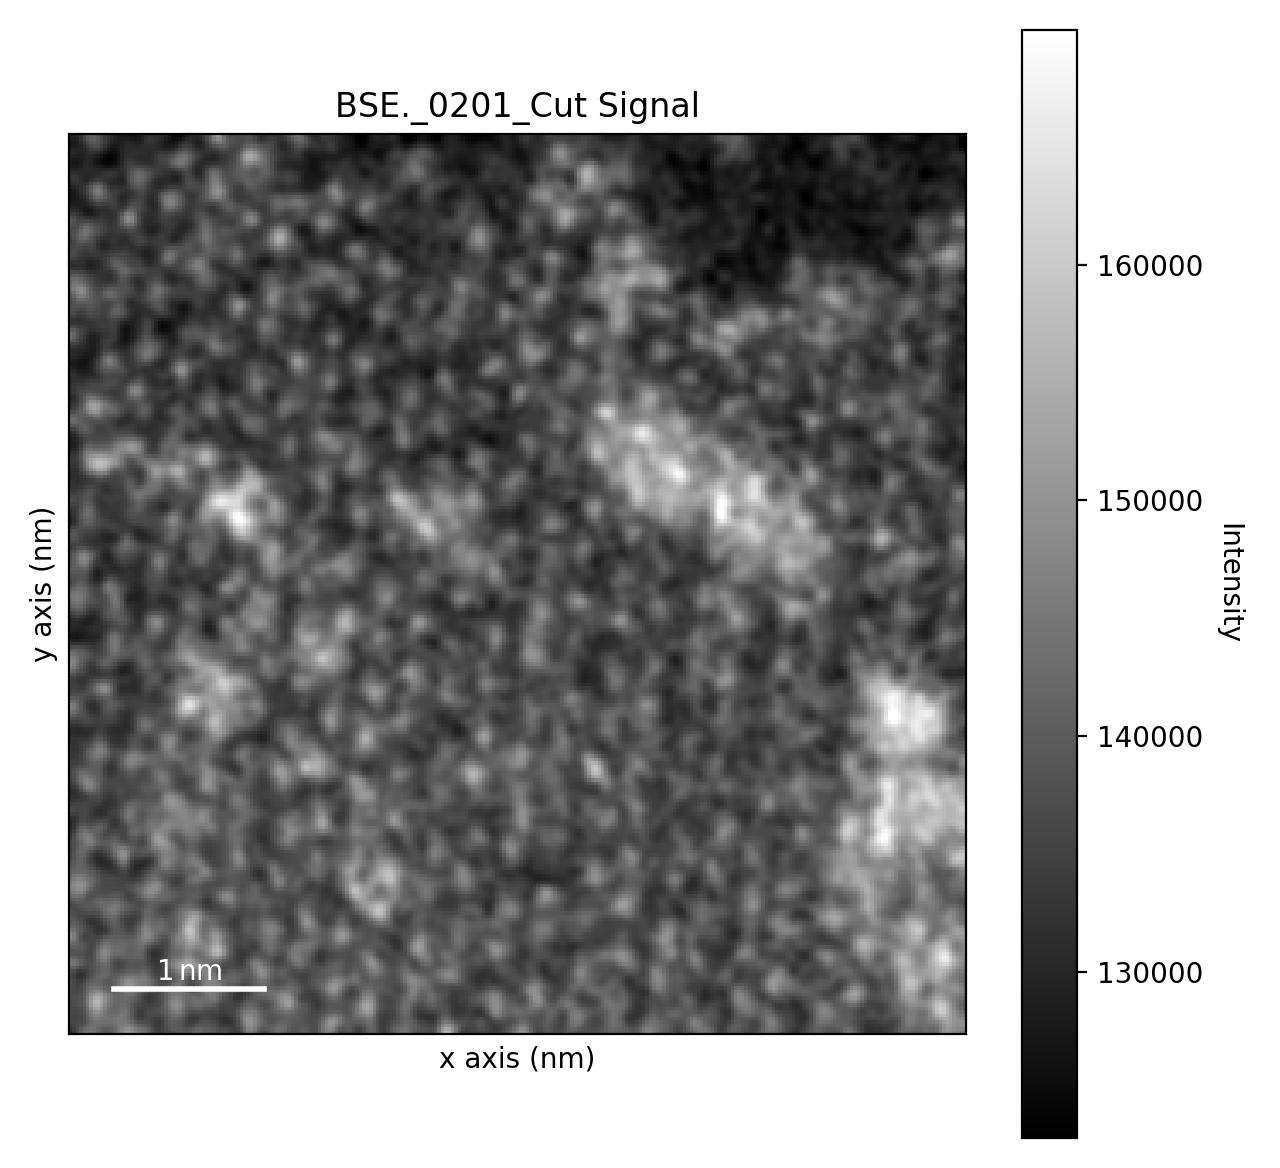

In [130]:
imc.map(scipy.ndimage.gaussian_filter, sigma=1.5)
imc.plot()

100%|██████████| 474/474 [00:00<00:00, 9202.46it/s]


<IPython.core.display.Javascript object>


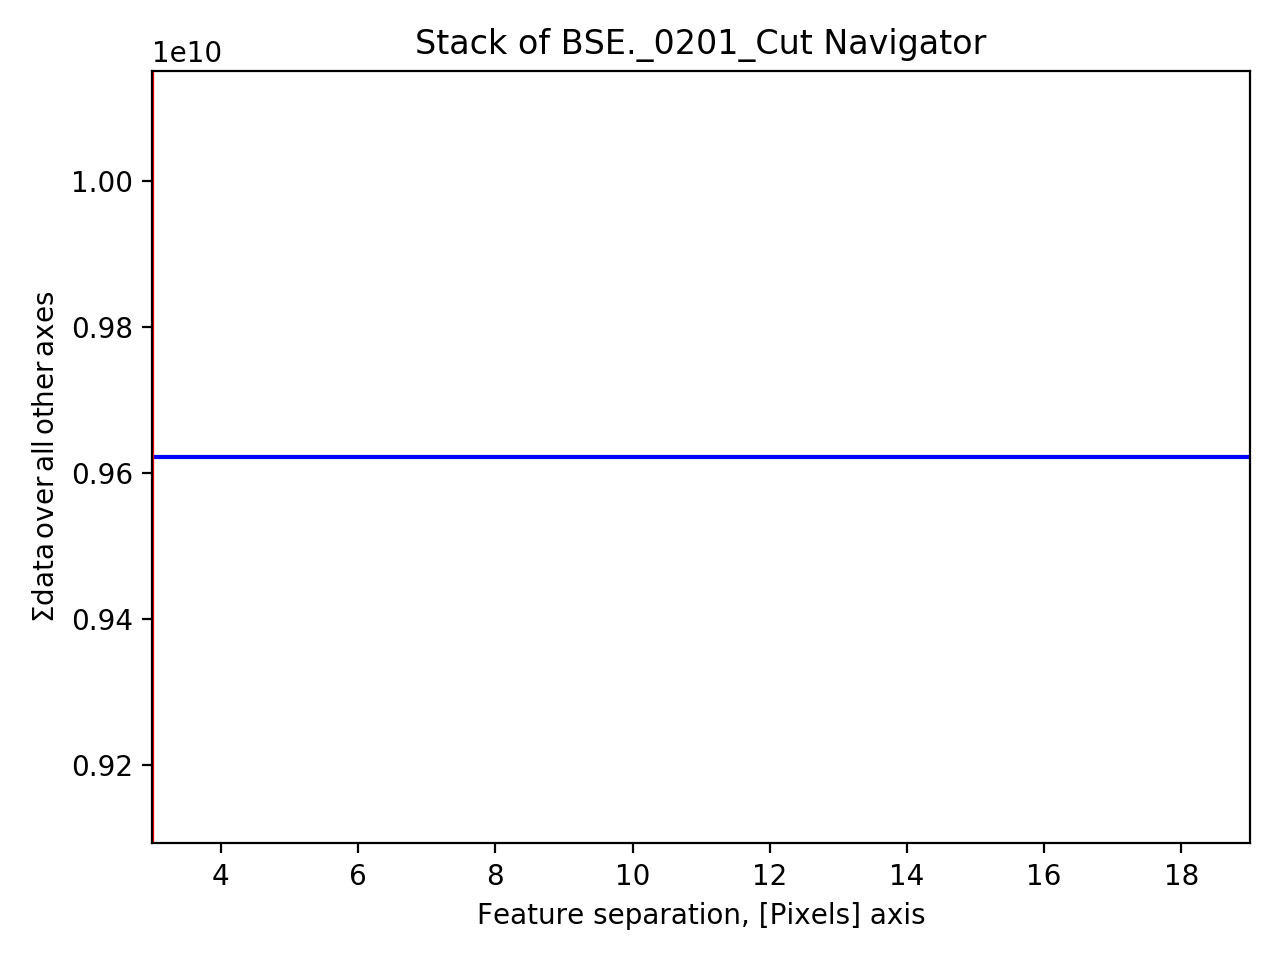

<IPython.core.display.Javascript object>


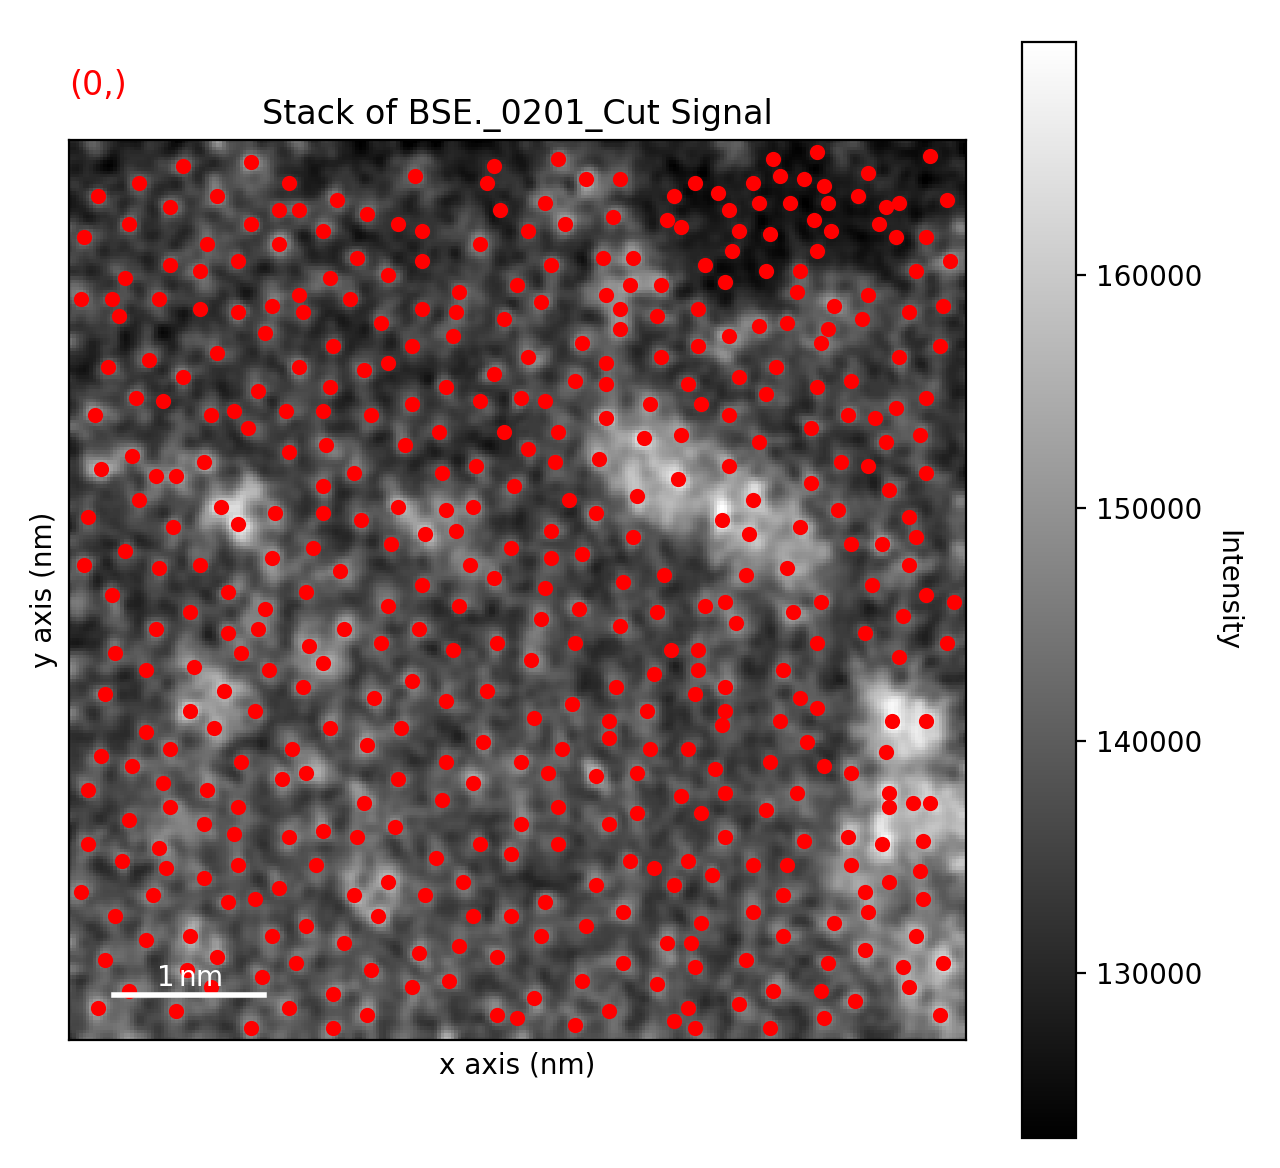

In [131]:
imc_peaks = am.get_feature_separation(imc, separation_range=(3, 20))
imc_peaks.plot()

In [132]:
atom_positions = am.get_atom_positions(imc, separation=5)
sublattice = am.Sublattice(atom_positions, image=imc.data)
sublattice

<Sublattice,  (atoms:351,planes:0)>

In [133]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 351/351 [00:07<00:00, 47.82it/s]


100%|██████████| 351/351 [00:00<00:00, 7693.32it/s]


<IPython.core.display.Javascript object>


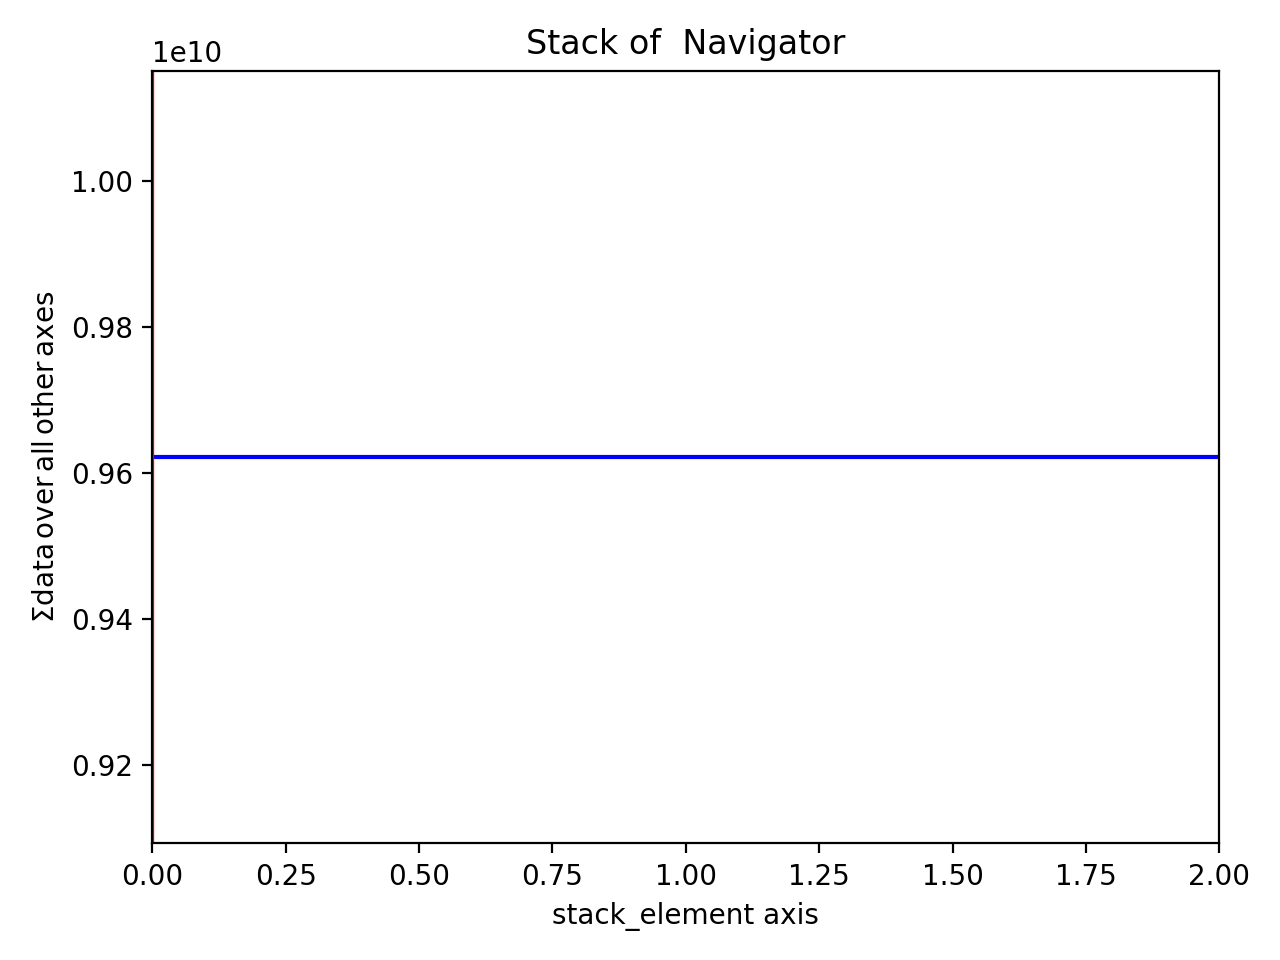

<IPython.core.display.Javascript object>


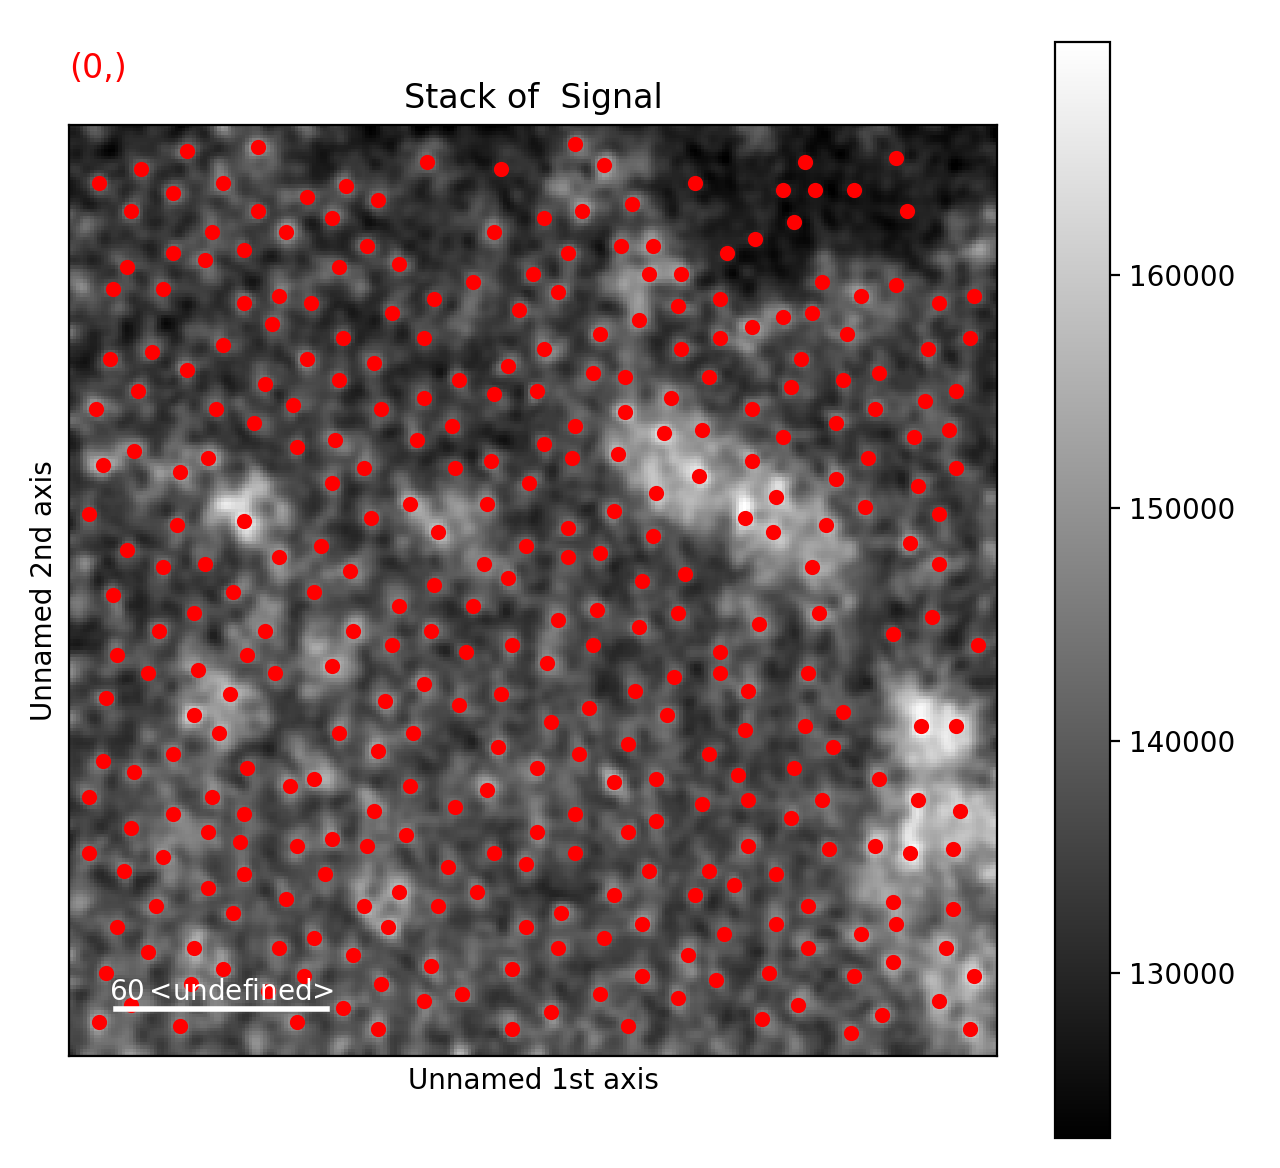

In [134]:
sublattice.get_position_history().plot()

In [135]:
atom_list = sublattice.atom_list
atom_list[0] 

<Atom_Position,  (x:221.1,y:257.2,sx:2.0,sy:2.3,r:0.4,e:1.1)>

In [110]:
sublattice.construct_zone_axes()
sublattice.plot_planes()

ValueError: Navigation shape of the marker must be 0 or the same navigation shape as this signal.

In [136]:
>>> import atomap.api as am
>>> s = am.dummy_data.get_atom_counting_signal()
>>> atom_positions = am.get_atom_positions(imc, separation=5)
>>> sublattice = am.Sublattice(atom_positions, imc)
>>> sublattice.construct_zone_axes()
>>> sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 351/351 [00:07<00:00, 46.69it/s]


<IPython.core.display.Javascript object>


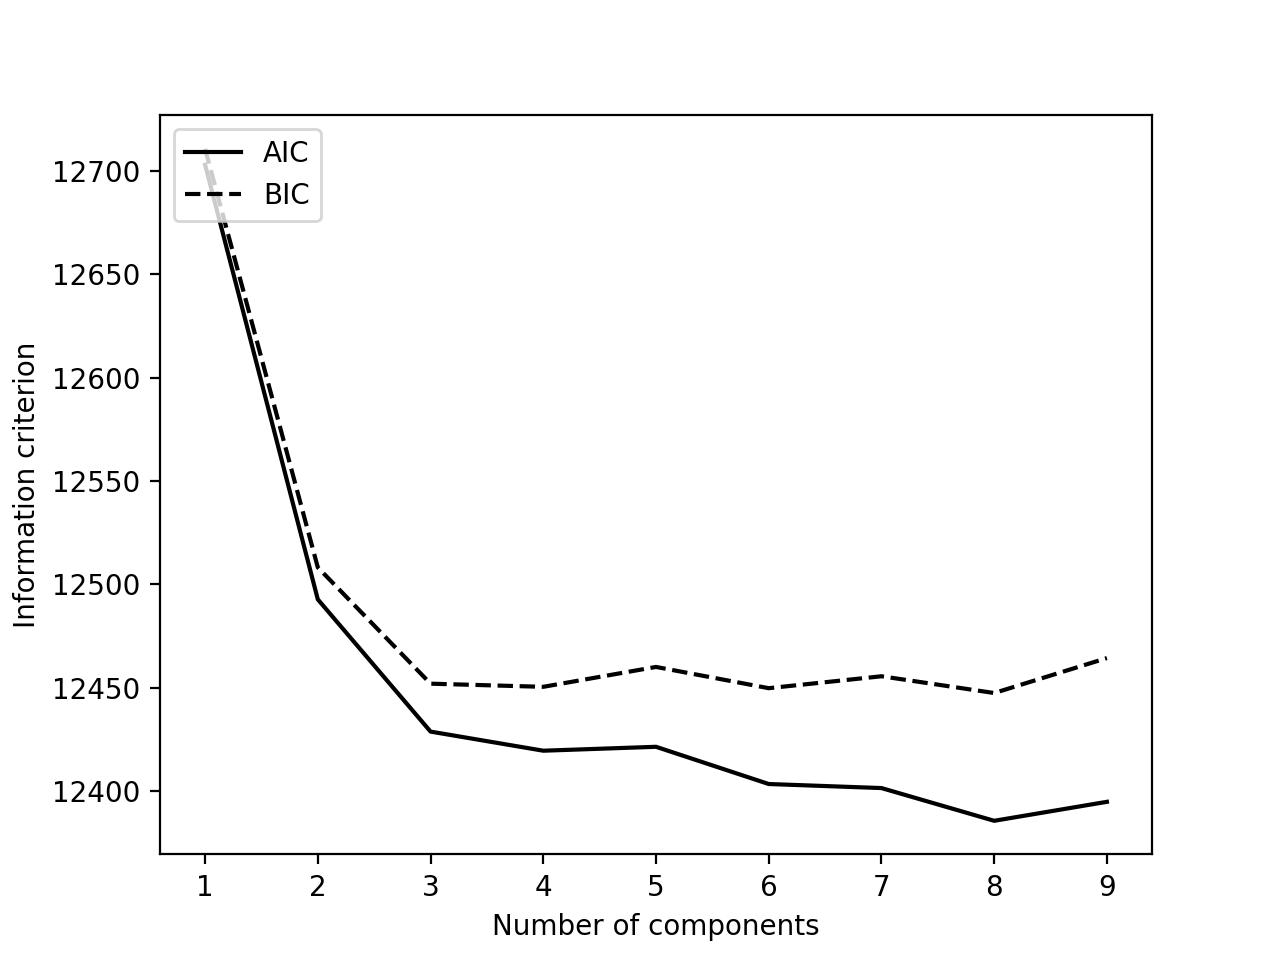

In [137]:
>>> models = am.quant.get_statistical_quant_criteria([sublattice], 10)


<IPython.core.display.Javascript object>


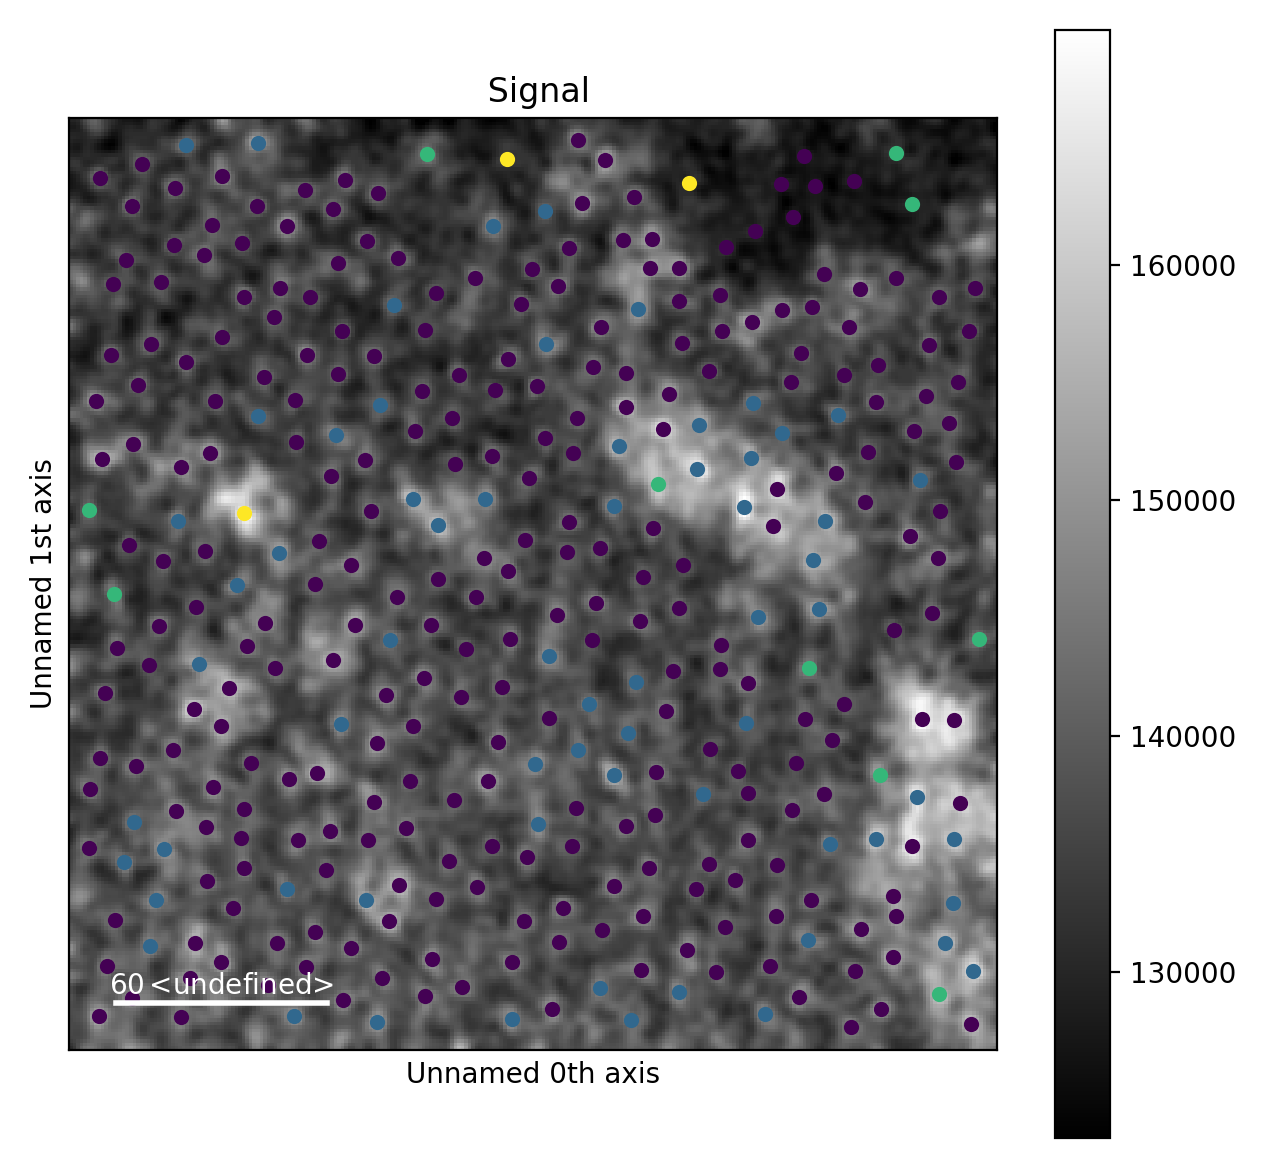

<IPython.core.display.Javascript object>


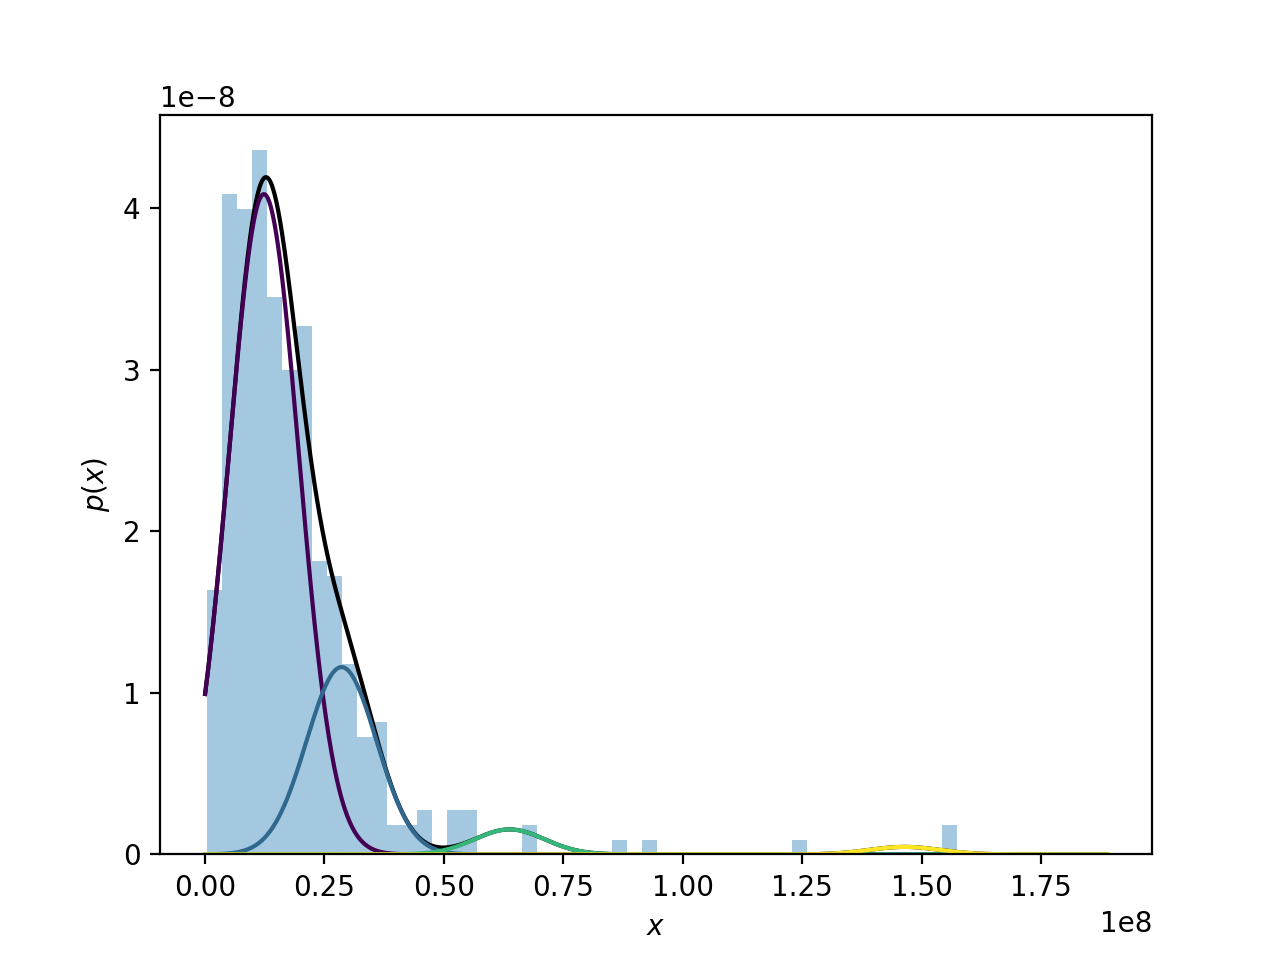

In [138]:
>>> model = models[3] # 4th model
>>> atom_lattice = am.quant.statistical_quant(sublattice.image, sublattice, model, 4)

Integrating: 100%|██████████| 351/351 [00:09<00:00, 37.75it/s]


<IPython.core.display.Javascript object>


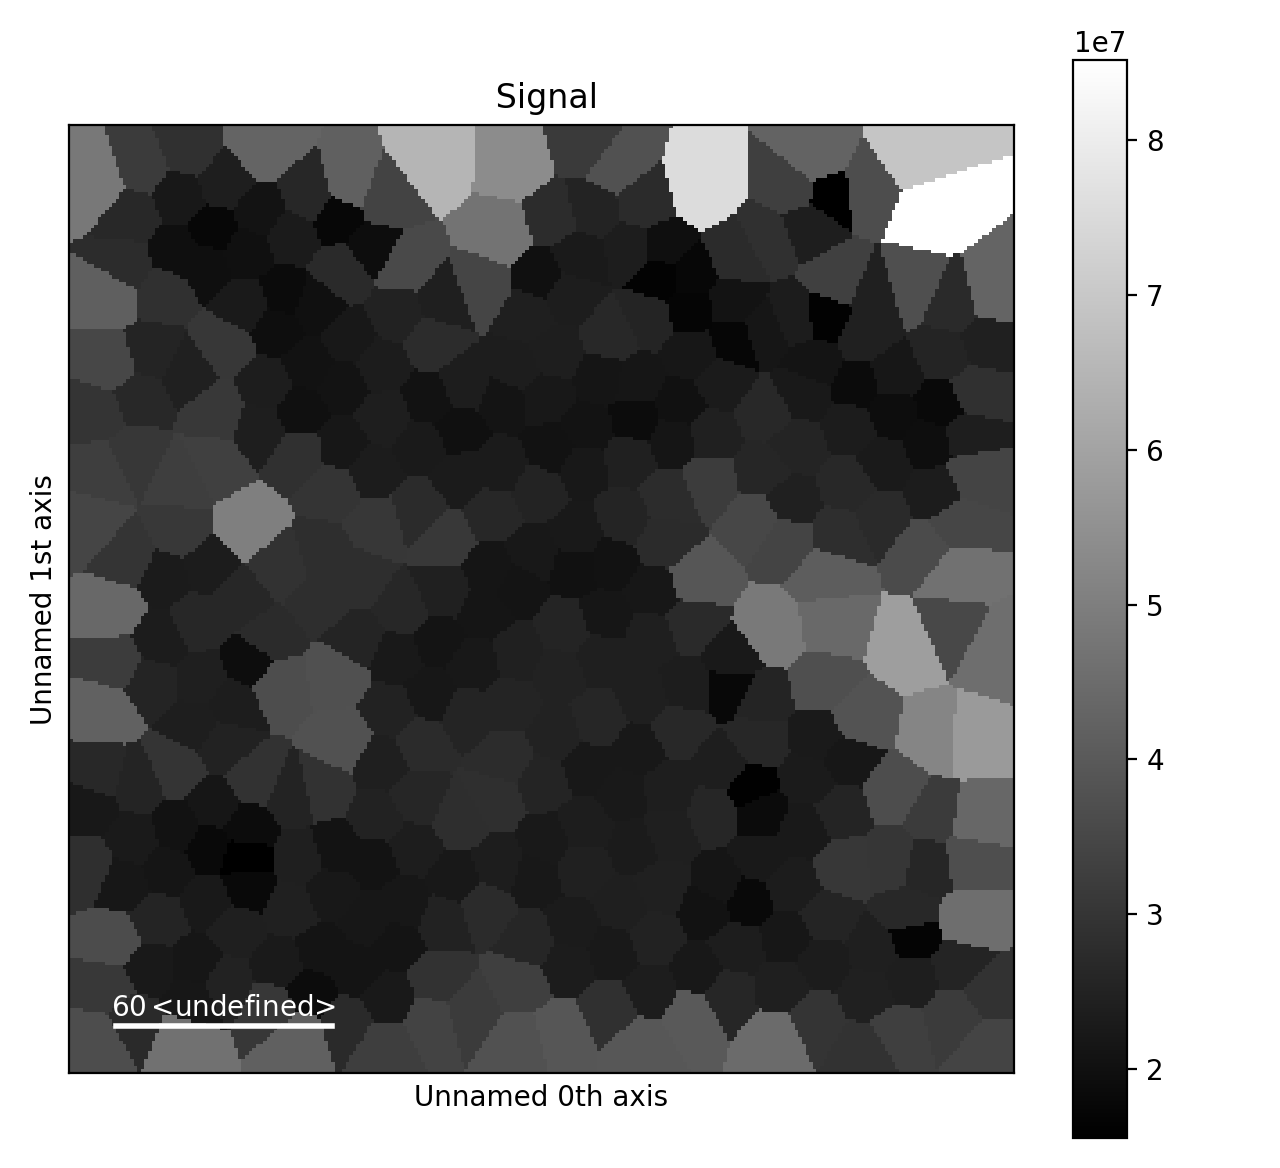

In [139]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity()
>>> i_record.plot()

Integrating: 100%|██████████| 351/351 [00:10<00:00, 34.09it/s]


<IPython.core.display.Javascript object>


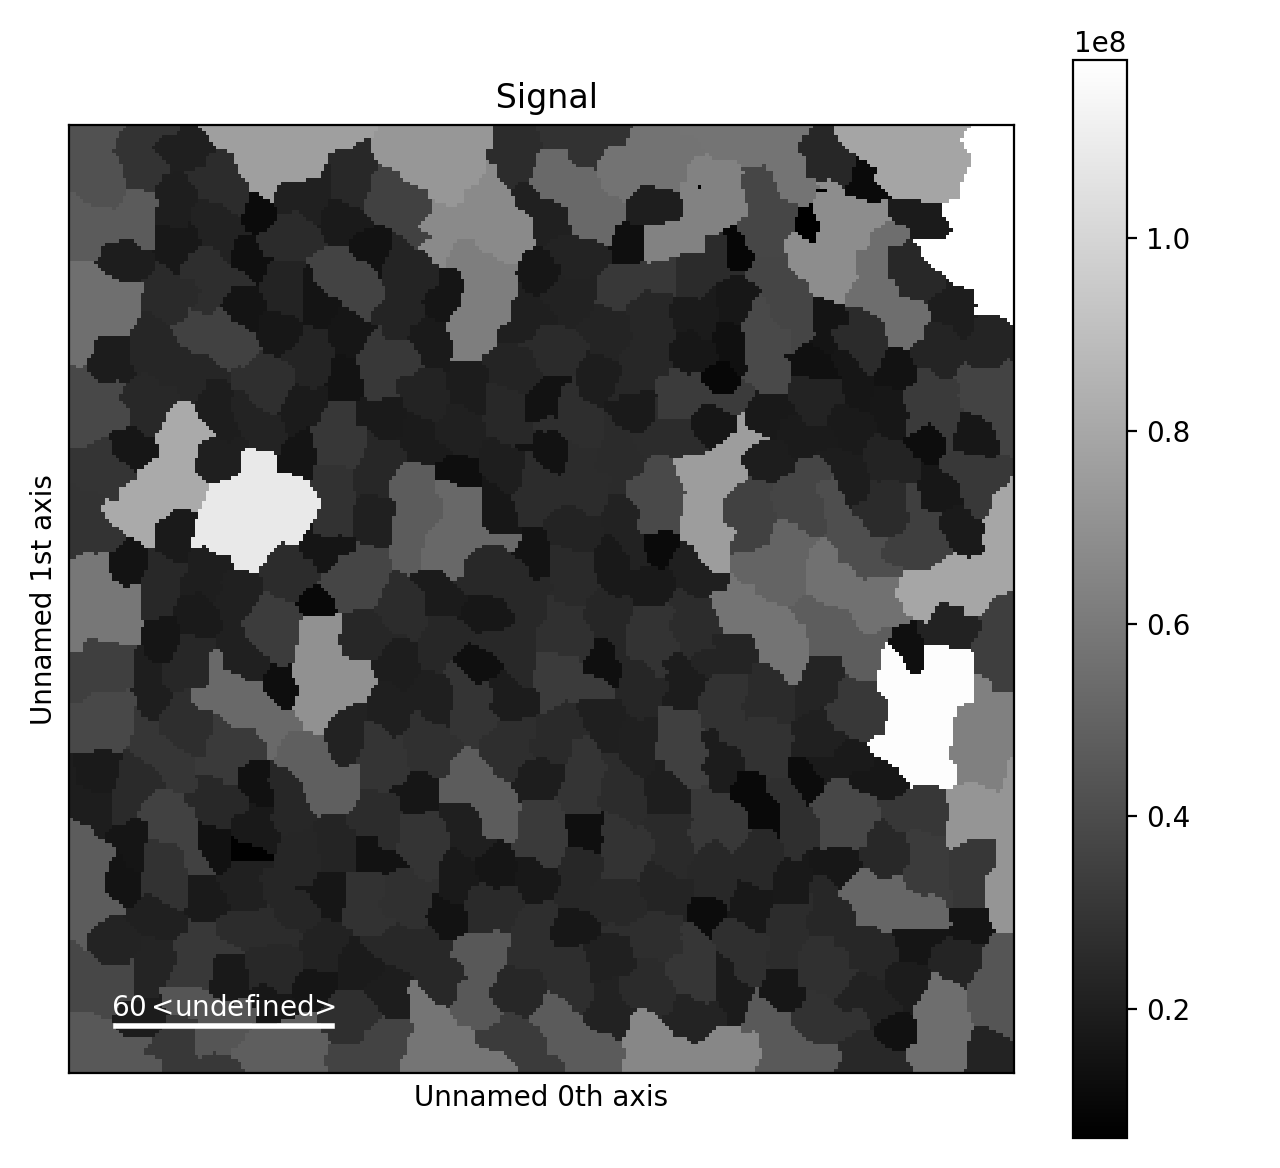

In [140]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity(
...         method='Watershed')
>>> i_record.plot()

Gaussian fitting: 100%|██████████| 104/104 [00:02<00:00, 49.46it/s]


<IPython.core.display.Javascript object>


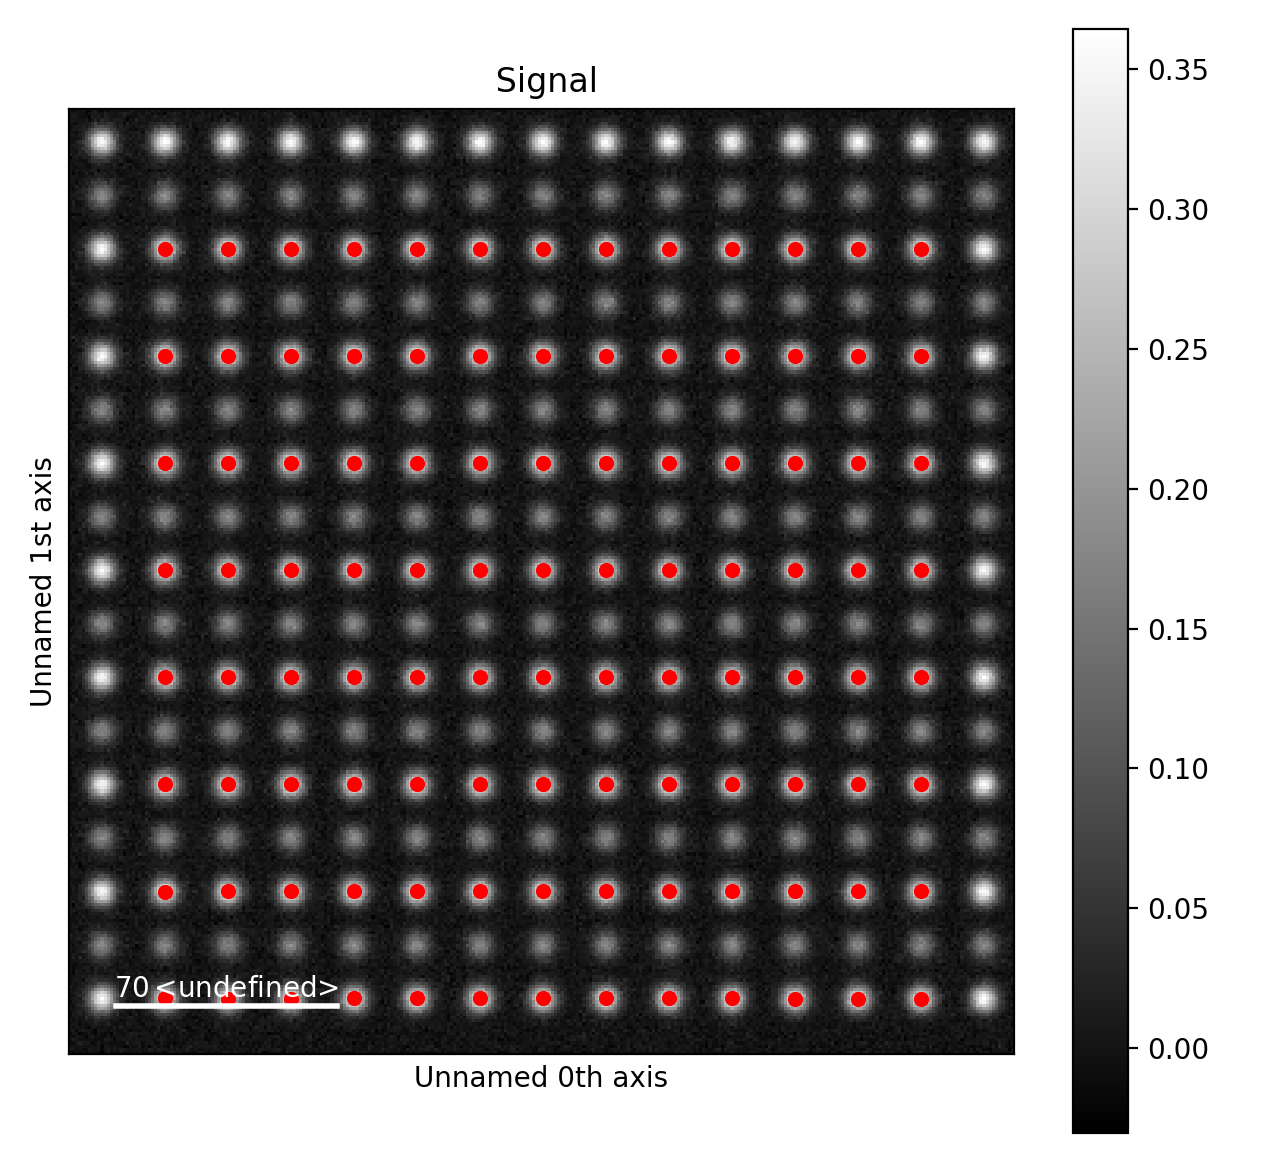

<IPython.core.display.Javascript object>


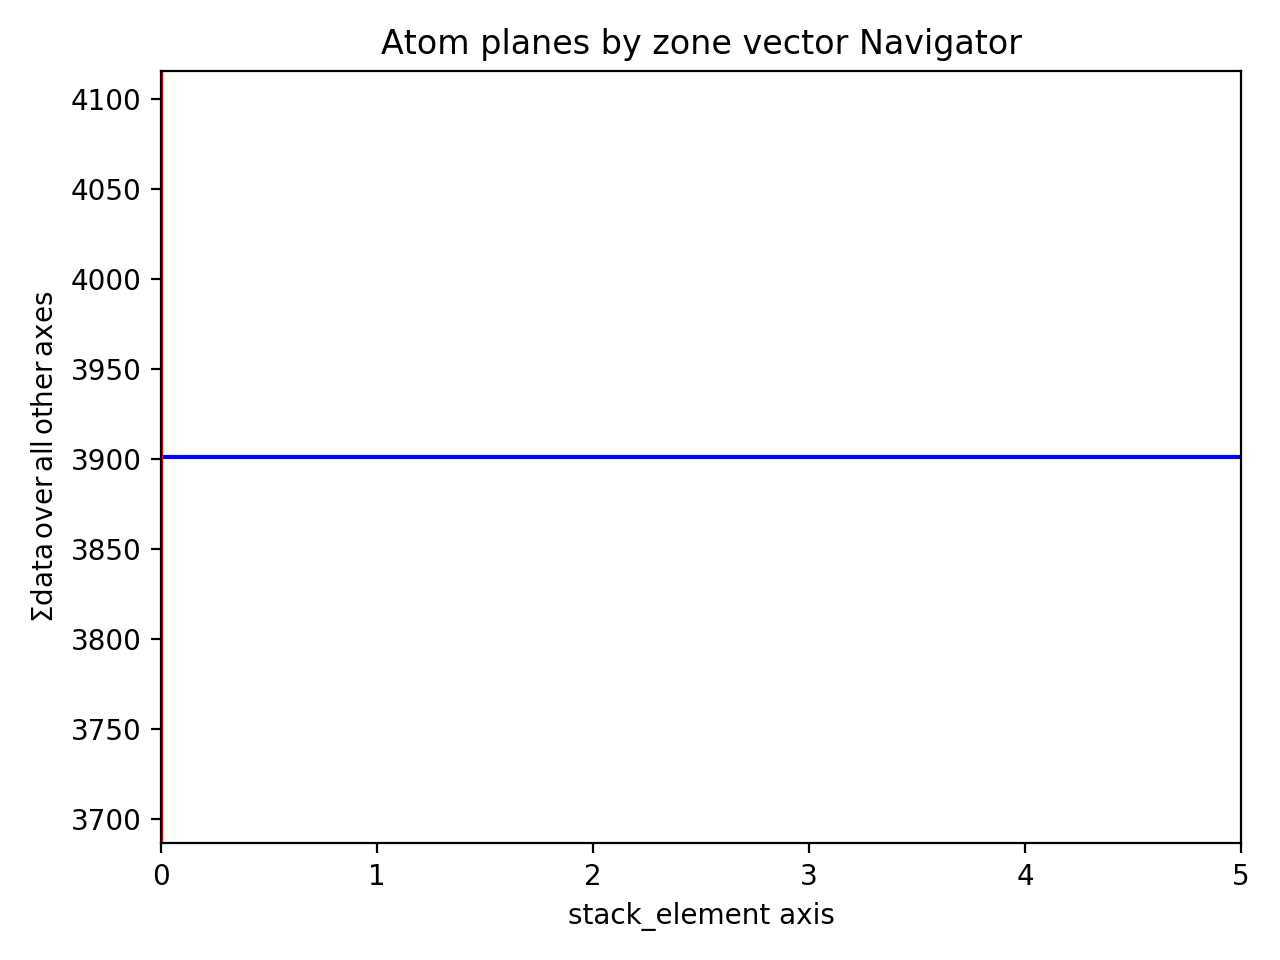

<IPython.core.display.Javascript object>


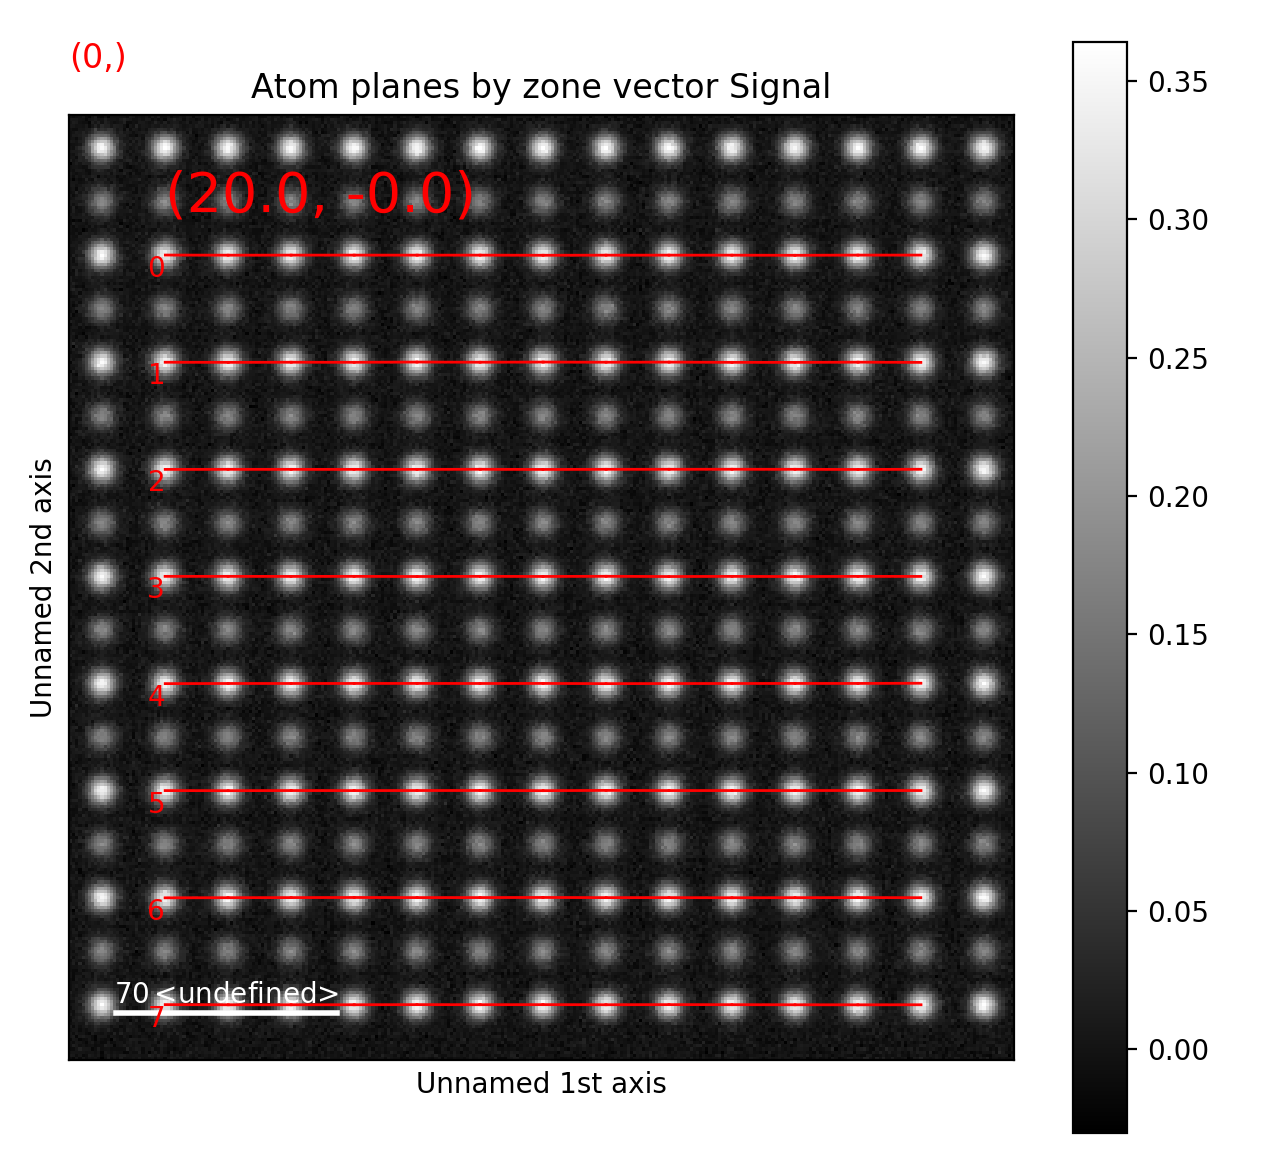

In [23]:
>>> s = dummy_data.get_two_sublattice_signal()
>>> A_positions = am.get_atom_positions(s, separation=15)
>>> sublattice_A = am.Sublattice(A_positions, image=s.data, color='r')
>>> sublattice_A.find_nearest_neighbors()
>>> sublattice_A.refine_atom_positions_using_center_of_mass()
>>> sublattice_A.refine_atom_positions_using_2d_gaussian()
>>> sublattice_A.construct_zone_axes()
>>> sublattice_A.plot()
>>> sublattice_A.plot_planes()

In [24]:
>>> zone_axis_001 = sublattice_A.zones_axis_average_distances[1]
>>> B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)

In [25]:
>>> from atomap.tools import remove_atoms_from_image_using_2d_gaussian
>>> image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Subtracting atoms: 100%|██████████| 104/104 [00:02<00:00, 44.15it/s]


In [26]:
>>> sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
>>> sublattice_B.construct_zone_axes()
>>> sublattice_B.refine_atom_positions_using_center_of_mass()
>>> sublattice_B.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 91/91 [00:01<00:00, 47.73it/s]


<IPython.core.display.Javascript object>


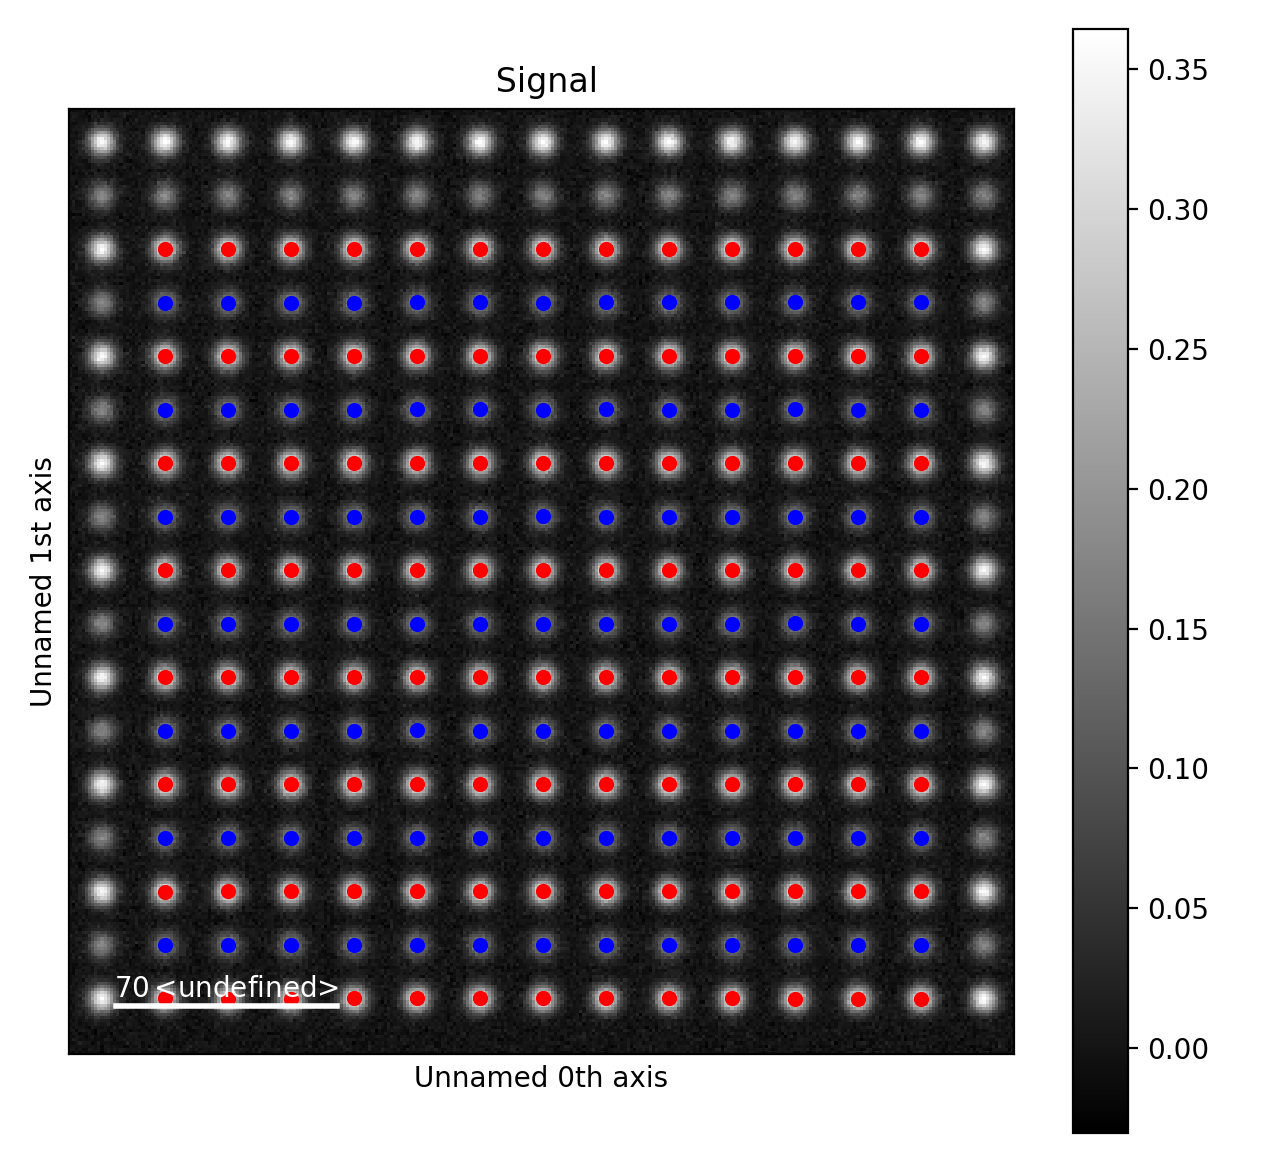

In [27]:
>>> atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
>>> atom_lattice.plot()

In [30]:
>>> zone = sublattice_A.zones_axis_average_distances[1]
>>> plane = sublattice_A.atom_planes_by_zone_vector[zone][7]
>>> s_elli_line = sublattice_A.get_ellipticity_line_profile(plane)

In [31]:
>>> position = s_elli_line.metadata.line_profile_data.x_list
>>> ellipticity = s_elli_line.metadata.line_profile_data.y_list
>>> standard_deviation = s_elli_line.metadata.line_profile_data.std_list

<IPython.core.display.Javascript object>


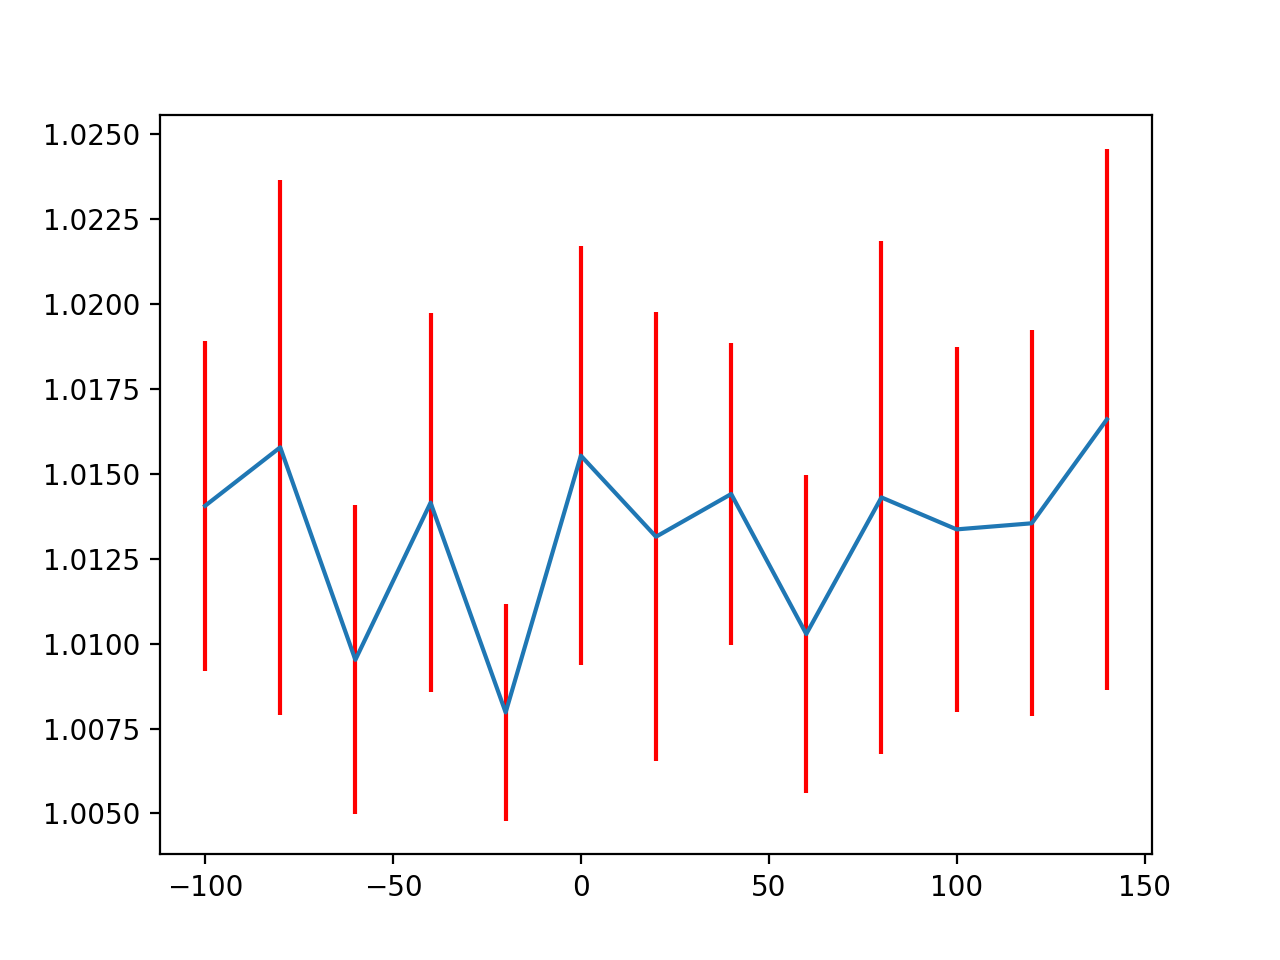

In [32]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> _ = ax.errorbar(position, ellipticity, yerr=standard_deviation, ecolor='red')
>>> fig.show()

In [33]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][0]
>>> s_monolayer_line = sublattice_B.get_monolayer_distance_line_profile(zone, plane)

In [34]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][-1]
>>> s_dd_line = sublattice_B.get_atom_distance_difference_line_profile(zone, plane)